In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [6]:
from scipy.stats import pearsonr
spotify_data = pd.read_csv('spotify52kData.csv')

correlation_coefficient, p_value = pearsonr(spotify_data['popularity'], spotify_data['duration'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("There is a significant linear relationship.")
    if correlation_coefficient > 0:
        print("The relationship is positive.")
    else:
        print("The relationship is negative.")
else:
    print("There is no significant linear relationship.")

Correlation Coefficient: -0.05465119593637637
P-Value: 1.0691602830486098e-35
There is a significant linear relationship.
The relationship is negative.


In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = spotify_data['duration'] 
y = spotify_data['popularity']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16415996)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse}')


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.16e-30
Time:                        18:48:26   Log-Likelihood:            -1.8703e+05
No. Observations:               41600   AIC:                         3.741e+05
Df Residuals:                   41598   BIC:                         3.741e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5806      0.235    151.658      0.0

Question 2

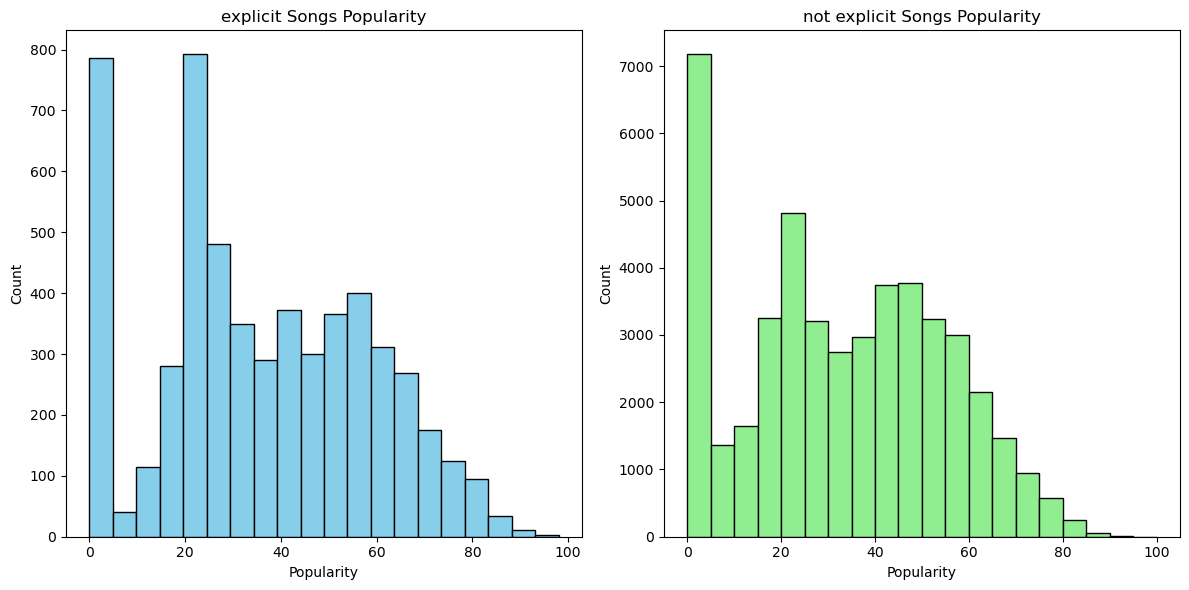

In [8]:
explicit_songs = spotify_data[spotify_data['explicit'] == True]['popularity']
non_explicit_songs = spotify_data[spotify_data['explicit'] == False]['popularity']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(explicit_songs, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('explicit Songs Popularity')
ax[0].set_xlabel('Popularity')
ax[0].set_ylabel('Count')

ax[1].hist(non_explicit_songs, bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('not explicit Songs Popularity')
ax[1].set_xlabel('Popularity')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import mannwhitneyu
u_stat, p_value = mannwhitneyu(explicit_songs, non_explicit_songs, alternative ='greater')
print(f"U-statistic: {u_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in popularity with explicit songs being more popular than without explicit songs.")
else:
    print("There is no significant difference in popularity with explicit songs being more popular than without explicit songs.")

U-statistic: 139361273.5, P-value: 1.5339599669557339e-19
There is a significant difference in popularity with explicit songs being more popular than without explicit songs.


Question 3

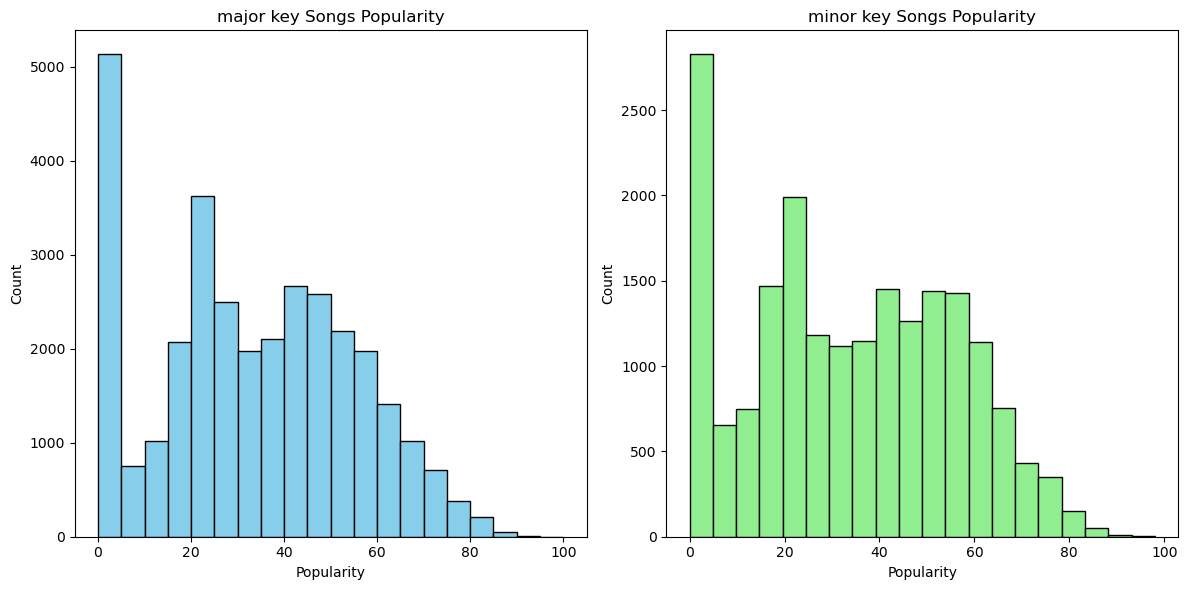

In [33]:
major_key_songs = spotify_data[spotify_data['mode'] == 1]['popularity']
minor_key_songs = spotify_data[spotify_data['mode'] == 0]['popularity']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(major_key_songs, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('major key Songs Popularity')
ax[0].set_xlabel('Popularity')
ax[0].set_ylabel('Count')

ax[1].hist(minor_key_songs, bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('minor key Songs Popularity')
ax[1].set_xlabel('Popularity')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [35]:
u_stat, p_value = mannwhitneyu(major_key_songs, minor_key_songs, alternative = 'greater')
print(f"U-statistic: {u_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in popularity with major key songs being more popular than minor key songs.")
else:
    print("There is no significant difference in popularity with major key songs being more popular than minor key songs.")

U-statistic: 309702373.0, P-value: 0.9999989912386331
There is no significant difference in popularity with major key songs being more popular than minor key songs.


Question 4

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

X = spotify_data[features]
y = spotify_data[target]

model_performance = []

for feature in features:
    X_single = X[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.3, random_state=16415996)

    model = LinearRegression().fit(X_train, y_train)

    test_score = model.score(X_test, y_test)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_performance.append((feature, test_score, rmse))

performance_df = pd.DataFrame(model_performance, columns=['Feature', 'Test Score', 'RMSE'])
print(performance_df)

            Feature  Test Score       RMSE
0          duration    0.003709  21.706529
1      danceability    0.002003  21.725103
2            energy    0.004619  21.696612
3          loudness    0.001482  21.730775
4       speechiness    0.001868  21.726570
5      acousticness    0.001046  21.735517
6  instrumentalness    0.020512  21.522697
7          liveness    0.002132  21.723698
8           valence    0.000798  21.738209
9             tempo   -0.000059  21.747533


Question 5

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

spotify_data = pd.read_csv('spotify52kData.csv')

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

X = spotify_data[features]
y = spotify_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16415996)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
print("Train score:", train_score)

test_score = pipeline.score(X_test, y_test)
print("Test score:", test_score)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Train score: 0.04768710579936386
Test score: 0.04734709029522177
Test RMSE: 21.225823090831135


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

X = spotify_data[features]
y = spotify_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16415996)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': np.linspace(1, 101, 100)}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Best parameters: {'ridge__alpha': 78.77777777777779}
Test score: 0.04734424924718961
Test RMSE: 21.225854741150652


In [52]:
from sklearn.linear_model import Lasso

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

X = spotify_data[features]
y = spotify_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16415996)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

param_grid = {'lasso__alpha': np.linspace(0.001, 0.1, 100)}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

lasso_coefs = best_model.named_steps['lasso'].coef_

print("\nLasso Regression Coefficients (Beta values):")
for feature, coef in zip(features, lasso_coefs):
    print(f"{feature}: {coef}")

Best parameters: {'lasso__alpha': 0.001}
Test score: 0.04734836900633621
Test RMSE: 21.225808845503835

Lasso Regression Coefficients (Beta values):
duration: -0.9006854157587265
danceability: 0.8393659261965011
energy: -3.3076418587423317
loudness: 3.358440286741195
speechiness: -1.0327024436009076
acousticness: 0.4194685563392695
instrumentalness: -2.832218686003615
liveness: -0.425841178236771
valence: -2.1110703860573974
tempo: 0.3075955199530284


In [53]:
spotify_data = pd.read_csv('spotify52kData.csv')

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence']
target = 'popularity'

X = spotify_data[features]
y = spotify_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16415996)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
print("Train score:", train_score)

test_score = pipeline.score(X_test, y_test)
print("Test score:", test_score)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Train score: 0.047501961811761806
Test score: 0.04741342598806486
Test RMSE: 21.225084073410102


Question 6

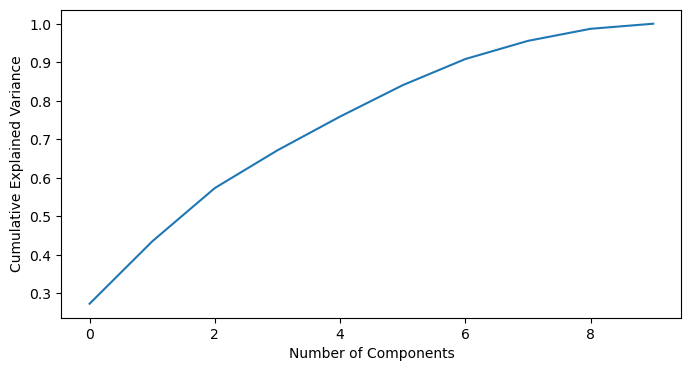

Number of components to keep:  7


In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
spotify_data = pd.read_csv('spotify52kData.csv')
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8,4))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print('Number of components to keep: ', n_components)

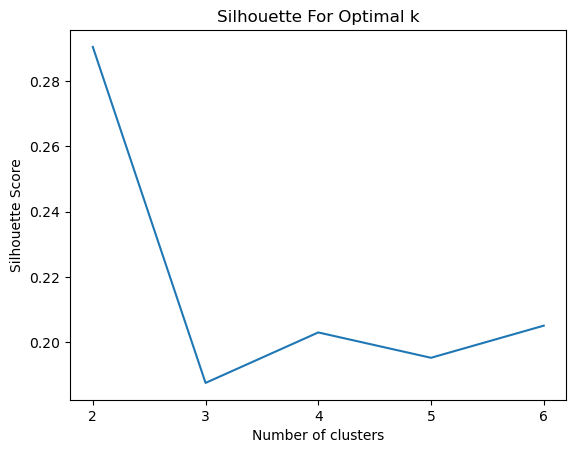

In [9]:
from sklearn.metrics import silhouette_score
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
silhouette_scores = []
K_range = range(2, 7)  
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=19142561, n_init=10)
    clusters = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, clusters)
    silhouette_scores.append(score)
plt.plot(K_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette For Optimal k')
plt.xticks(K_range)
plt.show()

Optimal number of clusters:  2


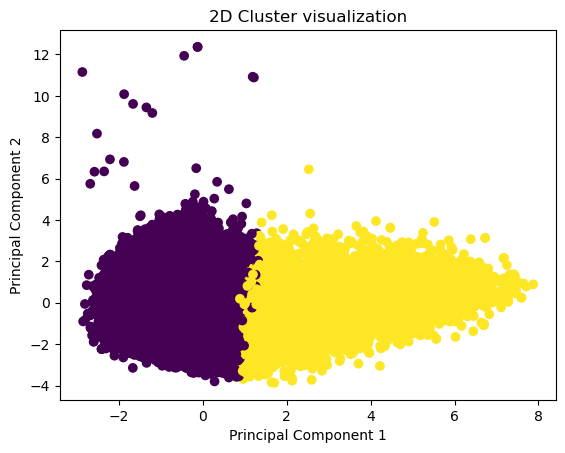

In [11]:
optimal_k = 2
print('Optimal number of clusters: ', optimal_k)
kmeans = KMeans(n_clusters=optimal_k, random_state=19142561, n_init=10)
clusters = kmeans.fit_predict(X_pca)
spotify_data['Cluster'] = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Cluster visualization')
plt.show()

Question 7

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
spotify_data = pd.read_csv('spotify52kData.csv')

X = spotify_data[['valence']]
y = spotify_data['mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19142561)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

print("Logistic Regression: ") 
print("Test Accuracy: {:.4f}".format(accuracy_log_reg))
print("Test AUC: {:.4f}".format(auc_log_reg))
print("Test Precision: {:.4f}".format(precision_log_reg))
print("Test Recall: {:.4f}".format(recall_log_reg))




Logistic Regression: 
Test Accuracy: 0.6247
Test AUC: 0.5044
Test Precision: 0.6247
Test Recall: 1.0000


In [21]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
X_scaled = scaler.fit_transform(X)

scoring_metrics = {'accuracy': 'accuracy',
                   'auc': 'roc_auc',
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score)}

cv_results = cross_validate(log_reg, X_scaled, y, cv=5, scoring=scoring_metrics)

print("Cross-Validation Results:")
print("Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("AUC: {:.4f}".format(cv_results['test_auc'].mean()))
print("Precision: {:.4f}".format(cv_results['test_precision'].mean()))
print("Recall: {:.4f}".format(cv_results['test_recall'].mean()))

Cross-Validation Results:
Accuracy: 0.6229
AUC: 0.5065
Precision: 0.6229
Recall: 1.0000


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
rf = RandomForestClassifier(random_state=19142561)
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
best_rf = RandomForestClassifier(**best_params, random_state=19142561)
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.62144231 0.62163462 0.62067308 0.62144231 0.62201923]
Mean CV Score: 0.6214423076923077


In [18]:
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

              precision    recall  f1-score   support

           0       0.57      0.02      0.03      3903
           1       0.63      0.99      0.77      6497

    accuracy                           0.63     10400
   macro avg       0.60      0.50      0.40     10400
weighted avg       0.61      0.63      0.49     10400

ROC-AUC Score: 0.5463630290193653
Precision-Recall AUC: 0.66117824386952


In [24]:
df = pd.read_csv('spotify52kData.csv')
major_count = df[df['mode'] == 1].shape[0]
minor_count = df[df['mode'] == 0].shape[0]
print(f"Number of songs in major key: {major_count}")
print(f"Number of songs in minor key: {minor_count}")

Number of songs in major key: 32391
Number of songs in minor key: 19609


Question 8

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data[features]
y = spotify_data['track_genre']  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=19142561)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=10, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')
y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=-1)  
y_true = y_test.argmax(axis=-1)        

Epoch 1/10
3328/3328 [==============================] - 3s 701us/step - loss: 3.0940 - accuracy: 0.1853 - val_loss: 2.8624 - val_accuracy: 0.2216
Epoch 2/10
3328/3328 [==============================] - 2s 687us/step - loss: 2.8208 - accuracy: 0.2301 - val_loss: 2.7999 - val_accuracy: 0.2379
Epoch 3/10
3328/3328 [==============================] - 2s 687us/step - loss: 2.7771 - accuracy: 0.2434 - val_loss: 2.7772 - val_accuracy: 0.2447
Epoch 4/10
3328/3328 [==============================] - 2s 669us/step - loss: 2.7521 - accuracy: 0.2476 - val_loss: 2.7605 - val_accuracy: 0.2413
Epoch 5/10
3328/3328 [==============================] - 2s 663us/step - loss: 2.7337 - accuracy: 0.2527 - val_loss: 2.7459 - val_accuracy: 0.2496
Epoch 6/10
3328/3328 [==============================] - 2s 675us/step - loss: 2.7186 - accuracy: 0.2566 - val_loss: 2.7311 - val_accuracy: 0.2553
Epoch 7/10
3328/3328 [==============================] - 2s 678us/step - loss: 2.7055 - accuracy: 0.2597 - val_loss: 2.7218 -

In [42]:
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)
print(f"Weighted Average Precision: {report['weighted avg']['precision']:.4f}")
print(f"Weighted Average Recall: {report['weighted avg']['recall']:.4f}")
print(f"Weighted Average F1-Score: {report['weighted avg']['f1-score']:.4f}")

Weighted Average Precision: 0.2408
Weighted Average Recall: 0.2562
Weighted Average F1-Score: 0.2302


Question 9

In [34]:
column_names = list(range(5000))
data_rating = pd.read_csv('starRatings.csv', header=None, names=column_names)
explicit_feedback_songs = spotify_data.iloc[:5000]
average_ratings = data_rating.mean(axis=0)
explicit_feedback_songs['average_rating'] = average_ratings.values
correlation, p_value = pearsonr(explicit_feedback_songs['popularity'], explicit_feedback_songs['average_rating'])
print("Correlation between popularity and average star rating: ", correlation)
print("P-value: ", p_value)


Correlation between popularity and average star rating:  0.5693914205195065
P-value:  0.0


C:\Users\xiaoy\AppData\Local\Temp\ipykernel_24004\3565627260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explicit_feedback_songs['average_rating'] = average_ratings.values


In [35]:
greatest_hits = explicit_feedback_songs.sort_values(by='popularity', ascending=False).head(10)
greatest_hits

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_rating
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alt-rock,3.729651
3003,3003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative,3.748950
3300,3300,Oliver Tree;Robin Schulz,Miss You,Miss You,87,206000,True,0.587,0.742,6,...,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,4,alternative,3.415400
2000,2000,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,...,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alt-rock,3.148004
3000,3000,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,...,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative,3.140594
2106,2106,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,...,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock,3.549039
3004,3004,GAYLE,abcdefu,abcdefu,86,168601,True,0.695,0.540,4,...,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,4,alternative,3.563261
2002,2002,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,...,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alt-rock,3.509865
3257,3257,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,...,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative,3.587866
3002,3002,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,...,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative,3.511397


Question 10

In [62]:
import nimfa
from math import sqrt

def calculate_rmse(true_values, predicted_values):
    return sqrt(mean_squared_error(true_values, predicted_values))

weights = data_rating.notna().astype(int)
ratings_filled = data_rating.fillna(0)

nmf = nimfa.Nmf(ratings_filled.values, seed="random_vcol", rank=10, max_iter=10, W=weights.values)
nmf_fit = nmf()
W = nmf_fit.basis()
H = nmf_fit.coef()
ratings_predicted = np.dot(W, H)
ratings_predicted


matrix([[0.26928359, 0.13669008, 0.20720982, ..., 0.09876935, 0.09302954,
         0.08517073],
        [0.35175166, 0.1771519 , 0.269832  , ..., 0.12901051, 0.11987362,
         0.11216859],
        [0.3747295 , 0.19167137, 0.29394455, ..., 0.13985484, 0.13040249,
         0.1221052 ],
        ...,
        [0.39740813, 0.20196226, 0.3109804 , ..., 0.14794686, 0.13913234,
         0.12830745],
        [0.28369541, 0.1444899 , 0.2210972 , ..., 0.10607899, 0.09991393,
         0.09261478],
        [0.31013502, 0.15702004, 0.23815018, ..., 0.11287461, 0.10913821,
         0.09869429]])

In [63]:
top_n = 10
recommendations = np.argsort(-ratings_predicted, axis=1)[:, :top_n]
likes = (data_rating.values >= 4).astype(int)
true_positives = 0
total_recommendations = 0
for user_index in range(data_rating.shape[0]):
    user_recommendations = recommendations[user_index]
    user_likes = likes[user_index, user_recommendations]
    true_positives += np.sum(user_likes)
    total_recommendations += top_n
precision = true_positives / total_recommendations
print(f"Precision: {precision}")



Precision: 0.08065


In [64]:
first_user_recommendations = np.array(recommendations[0]).flatten().tolist()
greatest_hits_song_numbers = set(greatest_hits['songNumber'])
common_songs_count = sum(song in greatest_hits_song_numbers for song in first_user_recommendations)
print(f"Number of common songs in the top 10 NMF recommendations for the first user and greatest hits: {common_songs_count}")

Number of common songs in the top 10 NMF recommendations for the first user and greatest hits: 2


In [48]:
true_positives = 0
possible_positives = np.sum(likes, axis=1)
recall_per_user = []

for user_index in range(data_rating.shape[0]):
    user_recommendations = recommendations[user_index]
    user_likes = likes[user_index, user_recommendations]
    true_positives = np.sum(user_likes)
    user_possible_positives = possible_positives[user_index]

    if user_possible_positives > 0:
        recall_per_user.append(true_positives / user_possible_positives)
    else:
        recall_per_user.append(0)

recall = np.mean(recall_per_user)
print(f"Recall: {recall}")


Recall: 0.010666372007436024


In [65]:
import nimfa
from math import sqrt

def calculate_rmse(true_values, predicted_values):
    return sqrt(mean_squared_error(true_values, predicted_values))

weights = data_rating.notna().astype(int)
ratings_filled = data_rating.fillna(data_rating.median())

nmf = nimfa.Nmf(ratings_filled.values, seed="random_vcol", rank=10, max_iter=10)
nmf_fit = nmf()
W = nmf_fit.basis()
H = nmf_fit.coef()
ratings_predicted = np.dot(W, H)
ratings_predicted

matrix([[3.85681952, 1.02142423, 1.98782054, ..., 0.09333064, 0.09099235,
         0.0837654 ],
        [3.98906868, 1.05643003, 2.0559783 , ..., 0.09649898, 0.09411453,
         0.08665006],
        [3.99715055, 1.05860521, 2.06012444, ..., 0.09680167, 0.09425107,
         0.08681555],
        ...,
        [4.02243252, 1.06523166, 2.07315764, ..., 0.09735806, 0.09487294,
         0.08738749],
        [3.90243083, 1.03351805, 2.01134804, ..., 0.09442915, 0.09210647,
         0.0847382 ],
        [3.96623594, 1.05041212, 2.04420654, ..., 0.09600167, 0.09357072,
         0.08616042]])

In [66]:
top_n = 10
recommendations = np.argsort(-ratings_predicted, axis=1)[:, :top_n]
likes = (data_rating.values >= 4).astype(int)
true_positives = 0
total_recommendations = 0
for user_index in range(data_rating.shape[0]):
    user_recommendations = recommendations[user_index]
    user_likes = likes[user_index, user_recommendations]
    true_positives += np.sum(user_likes)
    total_recommendations += top_n
precision = true_positives / total_recommendations
print(f"Precision: {precision}")


Precision: 0.07968


In [67]:
true_positives = 0
possible_positives = np.sum(likes, axis=1)
recall_per_user = []

for user_index in range(data_rating.shape[0]):
    user_recommendations = recommendations[user_index]
    user_likes = likes[user_index, user_recommendations]
    true_positives = np.sum(user_likes)
    user_possible_positives = possible_positives[user_index]

    if user_possible_positives > 0:
        recall_per_user.append(true_positives / user_possible_positives)
    else:
        recall_per_user.append(0)

recall = np.mean(recall_per_user)
print(f"Recall: {recall}")

Recall: 0.010729771228390615


In [68]:
first_user_recommendations = np.array(recommendations[0]).flatten().tolist()
greatest_hits_song_numbers = set(greatest_hits['songNumber'])
common_songs_count = sum(song in greatest_hits_song_numbers for song in first_user_recommendations)
print(f"Number of common songs in the top 10 NMF recommendations for the first user and greatest hits: {common_songs_count}")

Number of common songs in the top 10 NMF recommendations for the first user and greatest hits: 2


Extra credit

In [40]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = spotify_data[features].corr()
correlation_matrix

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration,1.000000,-0.050418,0.069038,0.015573,-0.046006,-0.114584,0.087854,0.017694,-0.116634,0.039569
danceability,-0.050418,1.000000,0.032566,0.161934,0.078249,-0.083630,-0.184119,-0.123451,0.484865,-0.091849
energy,0.069038,0.032566,1.000000,0.774881,0.132545,-0.736527,-0.166763,0.193006,0.164813,0.242307
loudness,0.015573,0.161934,0.774881,1.000000,0.028662,-0.614634,-0.415044,0.091726,0.182089,0.201937
speechiness,-0.046006,0.078249,0.132545,0.028662,1.000000,0.090438,-0.115857,0.328697,0.017491,-0.046185
acousticness,-0.114584,-0.083630,-0.736527,-0.614634,0.090438,1.000000,0.109359,-0.016120,-0.060525,-0.212488
instrumentalness,0.087854,-0.184119,-0.166763,-0.415044,-0.115857,0.109359,1.000000,-0.100967,-0.261925,-0.026134
liveness,0.017694,-0.123451,0.193006,0.091726,0.328697,-0.016120,-0.100967,1.000000,-0.008967,-0.002544
valence,-0.116634,0.484865,0.164813,0.182089,0.017491,-0.060525,-0.261925,-0.008967,1.000000,0.028185
tempo,0.039569,-0.091849,0.242307,0.201937,-0.046185,-0.212488,-0.026134,-0.002544,0.028185,1.000000


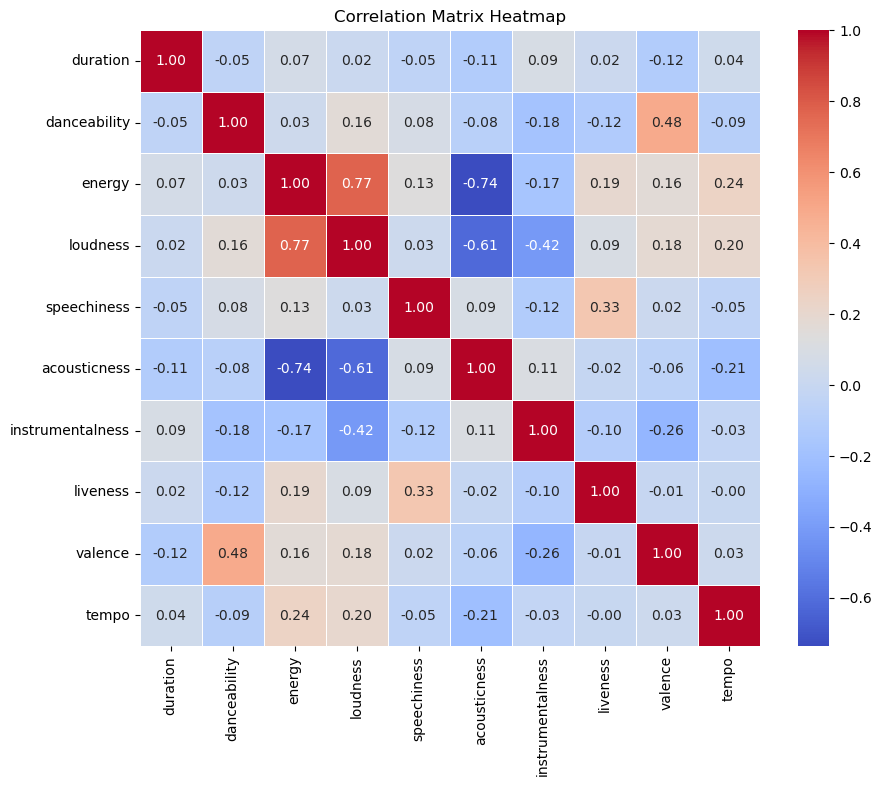

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()